In [1]:
import warnings
warnings.filterwarnings('ignore')

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from skimage import io

from skimage.measure import label

In [3]:
def plot_img(img, cmap='gray'):
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

## Image

min HU value = -1024; max HU value = 1442


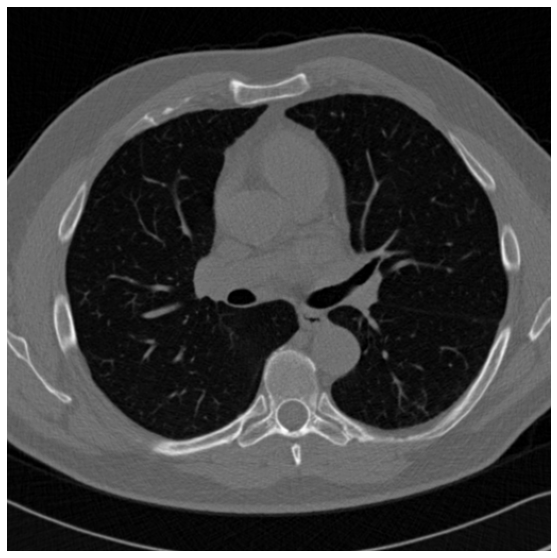

In [4]:
img = np.load('lungs_0.npy')

print(f'min HU value = {img.min()}; max HU value = {img.max()}')

plot_img(img)

## Binarization

You can read about Hounsfield units (HU) [here](https://en.wikipedia.org/wiki/Hounsfield_scale).

tldr; you need only values from the table **Substance** -- **HU**.

Basically, the first step is to create the binary mask for the "air" pixels,
i.e., to separate the air from the soft tissues (and other objects with even higher HU values).

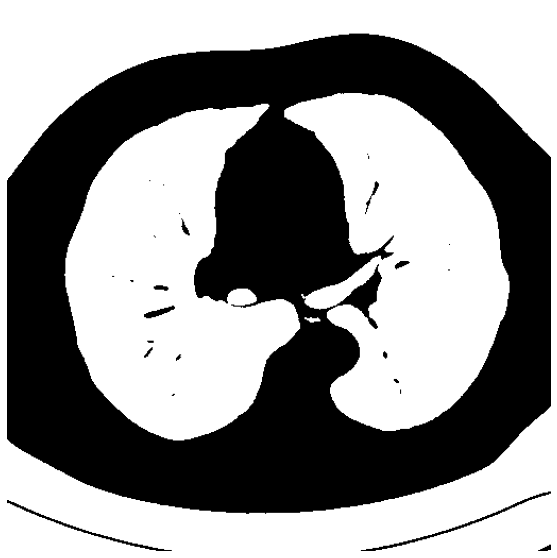

In [5]:
img_bin = img < -250
plot_img(img_bin)

... so far, so good. The following is the additional step to connect the "outer" components.

In [6]:
img_bin[..., :2] = 1
img_bin[..., -2:] = 1

## Removing the largest ("outer") connected component

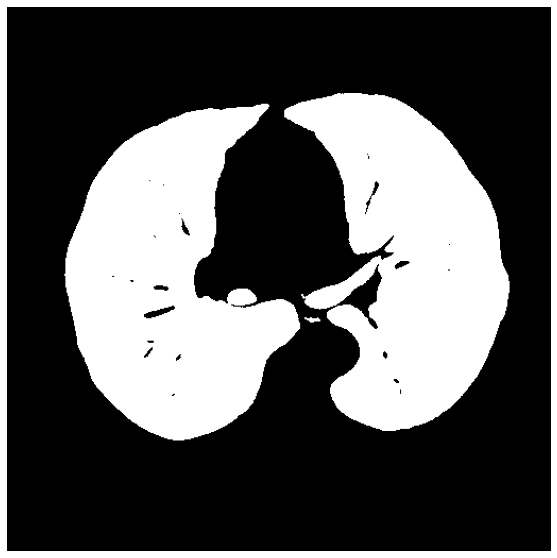

In [7]:
lbl, n_lbl = label(img_bin, connectivity=2, return_num=True)
lbl_sizes = [np.sum(lbl == n) for n in range(1, n_lbl + 1)]
img_bin[lbl == (np.argmax(lbl_sizes) + 1)] = 0

plot_img(img_bin)

## Morphology

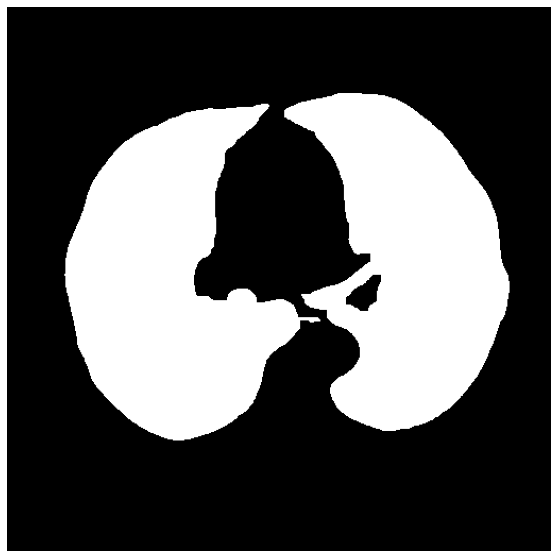

In [8]:
kernel_size = 7
kernel = np.ones((kernel_size, ) * 2, dtype='uint8')

img_bin = cv2.morphologyEx(np.uint8(img_bin), cv2.MORPH_CLOSE, kernel)

plot_img(img_bin)